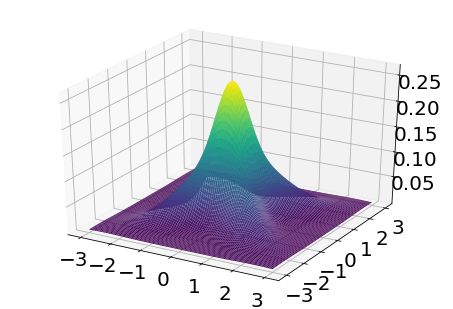

In [2]:
"""Author: Guo Xiao"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import time
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

mu1=0
mu2=0
sig1=1
sig2=1
rho1=0.8
rho2=-0.8
def nom2(x,y):
    return 1/(4*np.pi*sig1*sig2*np.sqrt(1-rho1**2))\
*np.exp(-1/(2*(1-rho1**2))*((x-mu1)**2/sig1**2-2*rho1*(x-mu1)*(y-mu2)/(sig1*sig2)+(y-mu2)**2/sig2**2))+\
1/(4*np.pi*sig1*sig2*np.sqrt(1-rho2**2))\
*np.exp(-1/(2*(1-rho2**2))*((x-mu1)**2/sig1**2-2*rho2*(x-mu1)*(y-mu2)/(sig1*sig2)+(y-mu2)**2/sig2**2))
X=np.linspace(-3,3,num=100)
Y=np.linspace(-3,3,num=100)
X, Y = np.meshgrid(X, Y)
#print X
#print Y
Z=nom2(X,Y)

'''z_lim=0.25
def zlim(x,y):
    return z_lim

z_upp = zlim(X,Y)'''
#print Z
#XX=X.reshape((10000))
#YY=Y.reshape((10000))
#ZZ=nom2(XX,YY)
#Z=ZZ.reshape((100,100))
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)
#ax.plot_surface(X, Y, z_upp, rstride=1, cstride=1, cmap=cm.viridis)
plt.show()


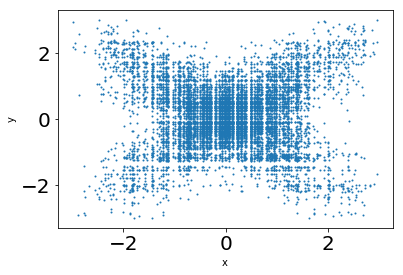

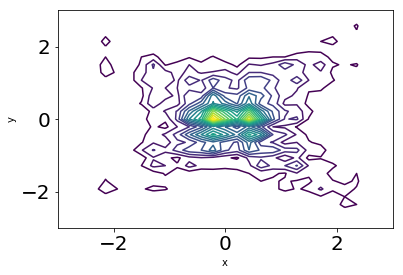

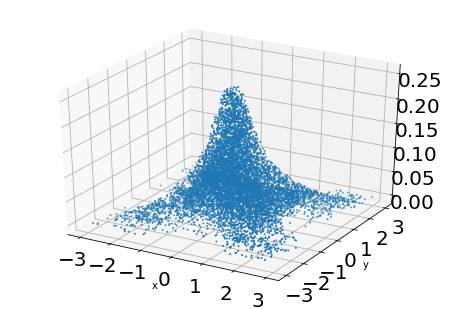

9110
0.101222222222


In [5]:
#rejection sampling using a Gaussian as a sample
import numpy as np
import scipy.stats as stats
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

z_lim=0.25
N=300
#step 1: draw random numbers 
x_rand = np.random.uniform(-3.,3.,size=N)
y_rand = np.random.uniform(-3.,3.,size=N)
x_rand, y_rand = np.meshgrid(x_rand, y_rand)
z_rand = np.random.uniform(0.,z_lim,size=N**2)
x_r=x_rand.reshape((N**2))
y_r=y_rand.reshape((N**2))
z_r=z_rand.reshape((N**2))
xx = x_r[z_r<=nom2(x_r,y_r)]
yy = y_r[z_r<=nom2(x_r,y_r)]
zz = z_r[z_r<=nom2(x_r,y_r)]
X=np.linspace(-3,3,num=N/10)
Y=np.linspace(-3,3,num=N/10)
#x=xx.reshape((N,N))
#y=yy.reshape((N,N))
Hxy,xedges,yedges = np.histogram2d(xx,yy,bins=[X,Y])
fig = plt.figure()
plt.scatter(xx,yy,s=1)
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.savefig('scatter2D.pdf')
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.imshow(HRD,extent=[yedges[0],yedges[-1],xedges[-1],xedges[0]])
ax.contour(Hxy,20,extent=[yedges[0],yedges[-1],xedges[0],xedges[-1]])    
ax.set_aspect('auto')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.savefig('counter.pdf')
fig = plt.figure()
ax = Axes3D(fig)
plt.xlabel(r'x')
plt.ylabel(r'y')
ax.scatter3D(xx,yy,zz,s=1)
plt.savefig('scatter.pdf')
plt.show()
print len(xx)
print len(xx)/float(N**2)

In [6]:
x_mean=np.mean(xx)
y_mean=np.mean(yy)
x_var=np.var(xx)
y_var=np.var(yy)
xy=np.mean((xx-x_mean)*(yy-y_mean))
yx=np.mean((yy-y_mean)*(xx-x_mean))
Cov=[[x_var,xy],[yx,y_var]]
print 'x_mean=',x_mean
print 'y_mean=',y_mean
print 'Covariance Matrix=',Cov

x_mean= 0.0582448020862
y_mean= 0.120941463161
Covariance Matrix= [[1.0110033849012798, -0.0022372714653943566], [-0.0022372714653943566, 0.98621672967871343]]
